In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
import IPython.display as ipd
from skimage.transform import resize

In [2]:
labels = pd.read_csv('../dataset/labels.csv')
labels.head()

set                    filename     label
0   A  artifact__201012172012.wav  artifact
1   A  artifact__201105040918.wav  artifact
2   A  artifact__201105041959.wav  artifact
3   A  artifact__201105051017.wav  artifact
4   A  artifact__201105060108.wav  artifact

In [3]:
# To check the distribution of the labels without 'artifact' data
labels[labels['label'] != 'artifact']

set                        filename     label
40        A      extrahls__201101070953.wav  extrahls
41        A      extrahls__201101091153.wav  extrahls
42        A      extrahls__201101152255.wav  extrahls
43        A      extrahls__201101160804.wav  extrahls
44        A      extrahls__201101160808.wav  extrahls
..      ...                             ...       ...
604  C-2023               normal_2023_1.wav    normal
605  C-2023               normal_2023_2.wav    normal
606  C-2023               normal_2023_3.wav    normal
607  C-2023        opening_snap_2023_16.wav    murmur
608  C-2023  panststolic_murmur_2023_17.wav    murmur

[569 rows x 3 columns]

In [4]:
labels

set                    filename     label
0         A  artifact__201012172012.wav  artifact
1         A  artifact__201105040918.wav  artifact
2         A  artifact__201105041959.wav  artifact
3         A  artifact__201105051017.wav  artifact
4         A  artifact__201105060108.wav  artifact
..      ...                         ...       ...
656  C-2023        artifact_2023_47.wav  artifact
657  C-2023        artifact_2023_48.wav  artifact
658  C-2023        artifact_2023_49.wav  artifact
659  C-2023        artifact_2023_50.wav  artifact
660  C-2023        artifact_2023_51.wav  artifact

[661 rows x 3 columns]

In [5]:
# Initialize lists to hold spectrograms and labels
spectrograms = []
label_list = []

In [6]:
import librosa
import librosa.display
import IPython.display as ipd
# Define a fixed length for the spectrograms
fixed_length = 1000  # You may need to adjust this value

# Iterate over each audio file
for index, row in labels.iterrows():

    filename = '../dataset/audio/' + row['filename']
    audio, sample_rate = librosa.load(filename, sr=None)

    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)

    # Pad or truncate the spectrogram to the fixed length
    if spectrogram.shape[1] > fixed_length:
        spectrogram = spectrogram[:, :fixed_length]
    else:
        padding = fixed_length - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), 'constant')

    # Append the spectrogram and label to the respective lists
    spectrograms.append(spectrogram)
    label_list.append(row['label'])

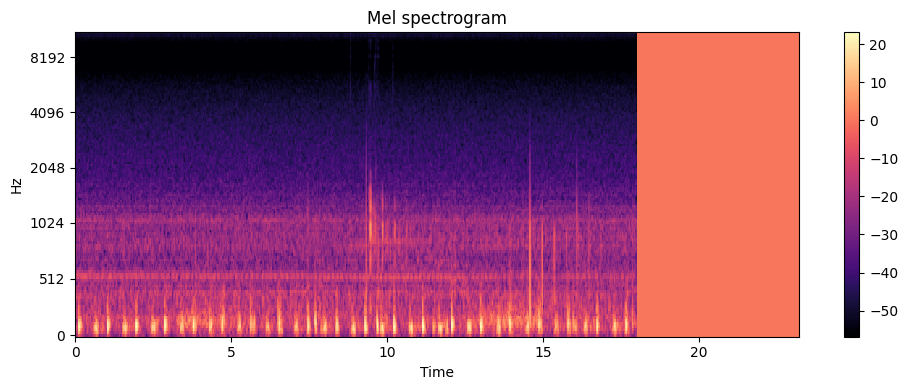

In [7]:
# print the spectogram[0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrograms[110], x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


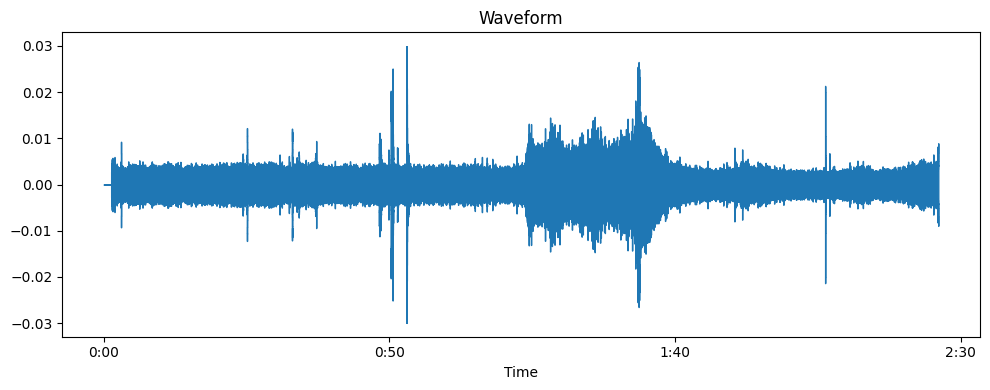

../dataset/audio/artifact_2023_51.wav


In [8]:
# print the audio wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Waveform')
plt.tight_layout()
plt.show()
# print the audio
ipd.Audio(audio, rate=sample_rate)
print(filename)


# EDA

In [9]:
label_counts = labels['label'].value_counts()

In [10]:
spectrograms = np.array(spectrograms)
spectrograms

array([[[-5.6919361e+01, -5.6919361e+01, -4.3147854e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-5.6919361e+01, -5.4065468e+01, -3.9360603e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-5.6919361e+01, -5.0552505e+01, -3.6972992e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-5.6919361e+01, -5.6919361e+01, -5.6919361e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-5.6919361e+01, -5.6919361e+01, -5.6919361e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-5.6919361e+01, -5.6919361e+01, -5.6919361e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[-8.7268303e+01, -8.7268303e+01, -8.7268303e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-8.7268303e+01, -8.7268303e+01, -8.7268303e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-8.7268303e+01, 

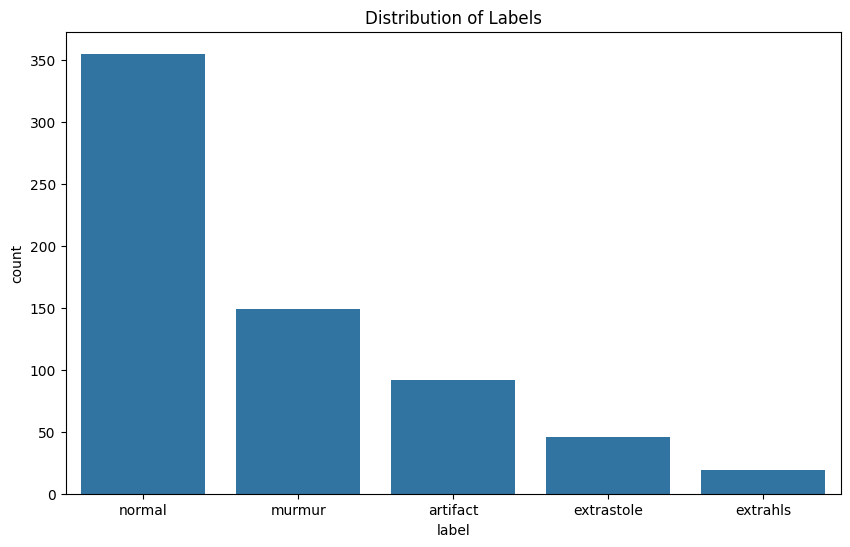

In [11]:

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts)
plt.title('Distribution of Labels')
plt.show()


In [12]:
# print the number of each classes
label_counts



label
normal        355
murmur        149
artifact       92
extrastole     46
extrahls       19
Name: count, dtype: int64

Class: normal


Class: murmur


Class: artifact


Class: extrastole


Class: extrahls


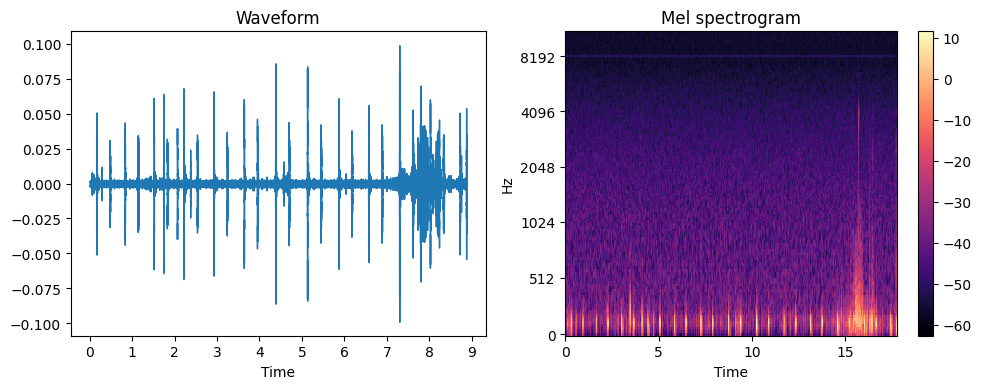

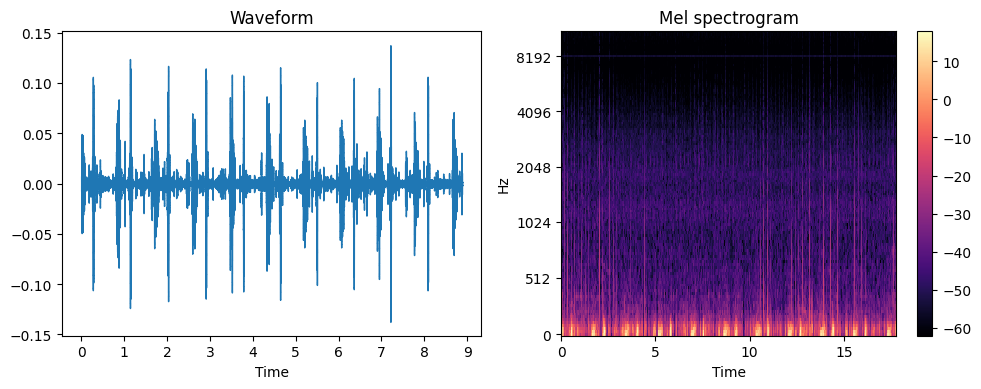

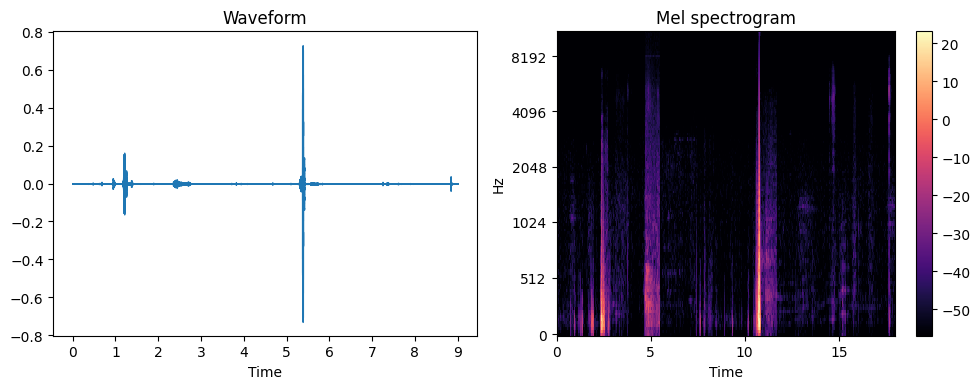

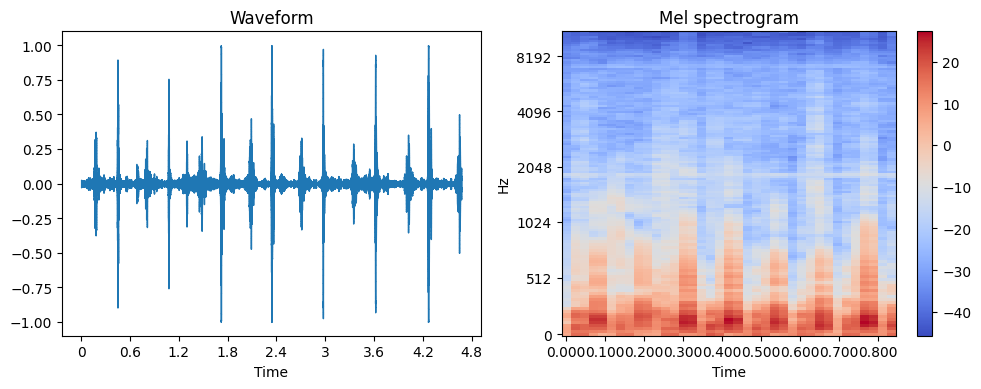

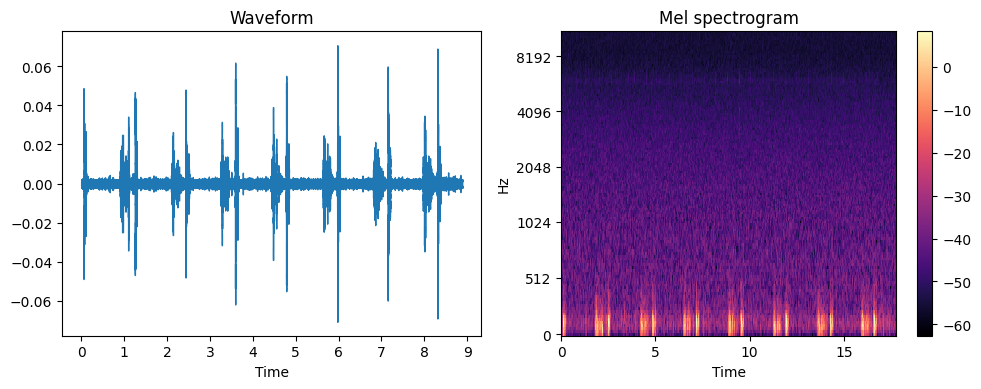

In [13]:
# Listen to samples from each class
for label in label_counts.index:
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    print(f'Class: {label}')
    filename = '../dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)
    ipd.display(ipd.Audio(audio, rate=sample_rate))

    # plot the waveform and the spectrogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title('Waveform')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('Mel spectrogram')
    plt.tight_layout()


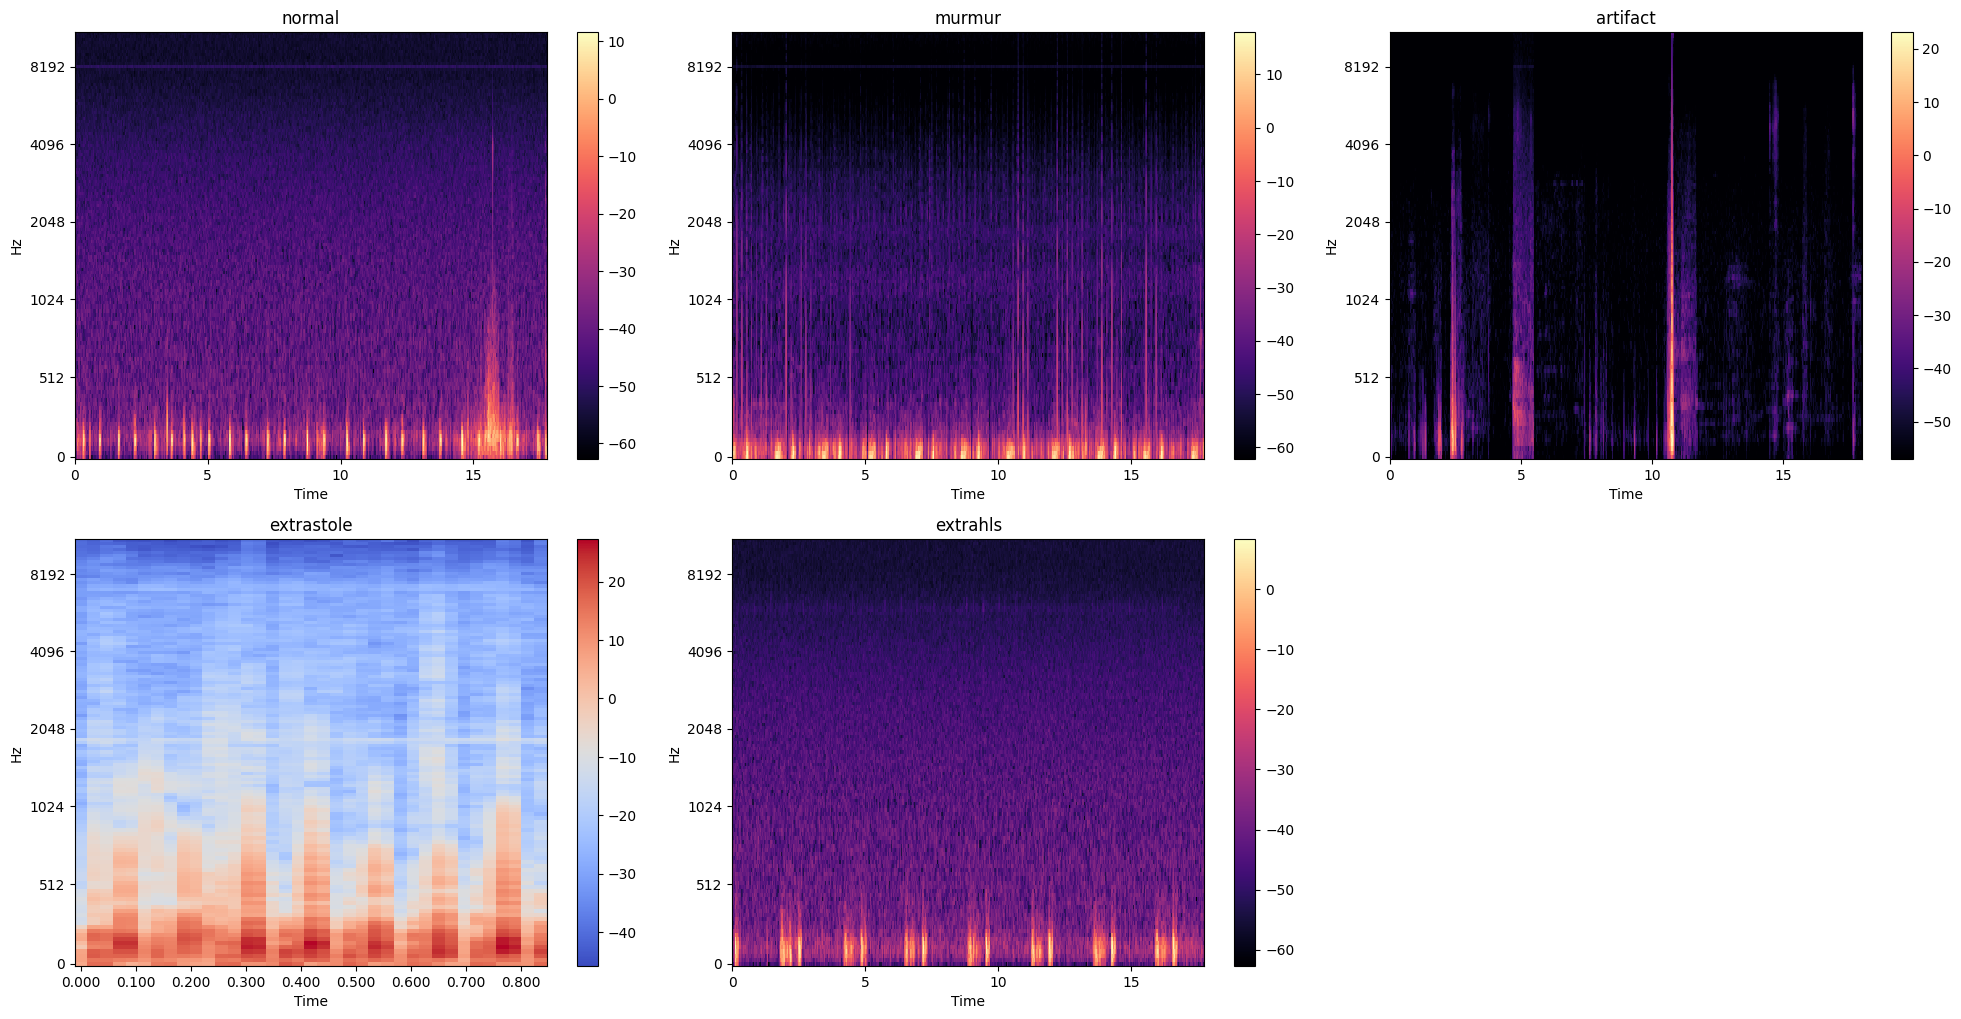

In [14]:
# plot the mel_spectrogram of each class with its label in 1 frame
plt.figure(figsize=(20, 20))
for i, label in enumerate(label_counts.index):
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    filename = '../dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)
    plt.subplot(4, 3, i + 1)
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(f'{label}')
plt.tight_layout()
plt.show()



# Data Preprocessing

- The sound contains a lot of noise, so we need to remove it. Using spectral gating.

In [15]:
from skimage.transform import resize
def audio_to_spectrogram(audio_data, sr, target_size=(128, 300)):
    S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
    
    S_dB = librosa.power_to_db(S, ref=np.max)
    S_dB_resized = resize(S_dB, target_size, mode='constant', anti_aliasing=True)
    return S_dB_resized

In [16]:
def pad_or_truncate(y, sr, target_duration=7):
    target_len = sr * target_duration
    if len(y) < target_len:
        y = np.pad(y, (0, target_len - len(y)), 'reflect')
    else:
        y = y[:target_len]
    return y

In [17]:
def load_artifacts(file_paths):
    artifacts = []
    for path in file_paths:
        audio, sr = librosa.load(path, sr=None)
        artifacts.append(audio)
    return artifacts, sr

In [18]:
artifact_files = []

for index, row in labels[labels['label'] == 'artifact'].iterrows():
    filename = '../dataset/audio/' + row['filename']
    artifact_files.append(filename)

In [19]:
artifacts, sr = load_artifacts(artifact_files)

In [20]:
# iterate through the artifacts and print the shape
for artifact in artifacts:
    print(artifact.shape)
    

(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(396900,)
(1334639,)
(263019,)
(1120288,)
(1694592,)
(895566,)
(1331759,)
(523008,)
(2899584,)
(10079998,)
(1975680,)
(1707520,)
(462848,)
(775168,)
(354304,)
(419840,)
(983040,)
(931840,)
(982016,)
(1042432,)
(1198080,)
(990208,)
(522240,)
(528384,)
(998400,)
(1003520,)
(1140736,)
(983040,)
(1060864,)
(1552384,)
(4223488,)
(1809408,)
(1749216,)
(236544,)
(321536,)
(548864,)
(339968,)
(533504,)
(650240,)
(240640,)
(1191936,)
(1441792,)
(950272,)
(966656,)
(911360,)
(298094,)
(1063936,)
(478080,)
(3310848,)
(1446912,)
(2127744,)
(5250816,)
(6443136,)


In [21]:
def compute_noise_profile(artifact_files):
    artifacts, sr = load_artifacts(artifact_files)
    
    # Determine the target length (using the minimum length here)
    target_length = min(len(a) for a in artifacts)
    
    # Pad or truncate all artifacts to the target length
    aligned_artifacts = [pad_or_truncate(a, target_length) for a in artifacts]
    
    # Stack and compute the median
    noise_profile = np.median(np.stack(aligned_artifacts), axis=0)
    
    return noise_profile, sr

In [22]:
noise_profile, noise_sr = compute_noise_profile(artifact_files)
noise_profile.shape, sr

((1655808,), 44100)

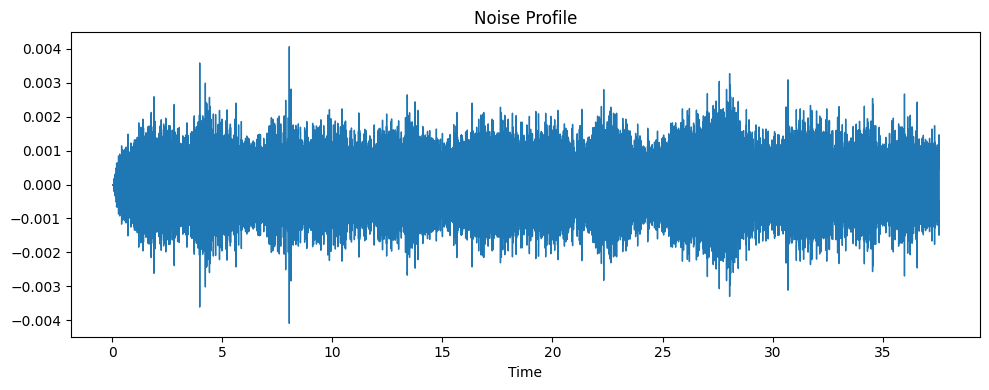

In [23]:
# print the waveform of the noise profile
plt.figure(figsize=(10, 4))
librosa.display.waveshow(noise_profile, sr=noise_sr)
plt.title('Noise Profile')
plt.tight_layout()
plt.show()


In [24]:
from scipy.signal import wiener
def reduce_noise_wiener(y, noise_profile):
    # Ensure the input and noise profile are of the same length
    target_length = min(len(y), len(noise_profile))
    y = pad_or_truncate(y, target_length)
    noise_profile = pad_or_truncate(noise_profile, target_length)
    
    noise_reduced = wiener(y - noise_profile)
    return noise_reduced

In [25]:
from scipy.signal import fftconvolve
def reduce_noise(y, sr, noise_profile):
    # Compute the STFT of the noisy signal
    stft_noisy = librosa.stft(y)
    stft_noise = librosa.stft(noise_profile)

    # Compute the magnitude spectrograms
    magnitude_noisy = np.abs(stft_noisy)
    magnitude_noise = np.abs(stft_noise)

    # Compute the average noise spectrum
    noise_mean = np.mean(magnitude_noise, axis=1, keepdims=True)

    # Subtract the noise spectrum from the noisy signal spectrum
    magnitude_clean = magnitude_noisy - noise_mean

    # Ensure no negative values
    magnitude_clean = np.maximum(magnitude_clean, 0)

    # Reconstruct the clean signal
    stft_clean = magnitude_clean * np.exp(1j * np.angle(stft_noisy))
    y_clean = librosa.istft(stft_clean)
    
    return y_clean


In [26]:
import noisereduce as nr
def reduce_noise_nr(y, noise_profile):
    y_clean = nr.reduce_noise(y, noise_profile)
    return y_clean

In [27]:
# Example usage
heartbeat_file = '../dataset/audio/normal_noisynormal_105_1305033453095_A.wav'
y_heartbeat, sr_heartbeat = librosa.load(heartbeat_file, sr=None)
y_clean = reduce_noise_wiener(y_heartbeat, noise_profile)

ipd.display(ipd.Audio(y_clean, rate=sr_heartbeat))

In [28]:
spectrograms = []
metadatas = []
labels_list = []

data_dir = '../dataset/audio'
# Process each audio file and get the corresponding label from the CSV
for index, row in labels.iterrows():
    file_name = row['filename']
    label = row['label']
    set_name = row['set']
    file_path = os.path.join(data_dir, file_name)
    
    if file_path.endswith('.wav') and os.path.isfile(file_path):  # Ensure the file is an audio file and exists
        try:
            if "noisynormal" in file_name or "noisymurmur" in file_name:
                # Apply noise reduction
                y, sr = librosa.load(file_path)
                y = pad_or_truncate(y, sr)
                # audio_data = spectral_subtraction(y, noise_profile, sr)
                audio_data = reduce_noise_wiener(y, noise_profile)
                # audio_data = reduce_noise_nr(y, sr)
                spectrogram = audio_to_spectrogram(audio_data, sr)  # Ensure audio_data and sr are passed correctly
            elif "artifact" in file_name and label == 'artifact':
                # Do not process artifacts
                continue
            elif "extrahls" in file_name:
                continue
            elif "extrastole" in file_name:
                continue
            else:
                y, sr = librosa.load(file_path)
                y = pad_or_truncate(y, sr)
                audio_data = reduce_noise_wiener(y, noise_profile)
                spectrogram = audio_to_spectrogram(audio_data, sr)  # Ensure y and sr are passed correctly
            
            spectrograms.append(spectrogram)
            labels_list.append(label)
            
            
            print(f"Processed {file_name}\tshape={spectrogram.shape}\tlabel={label}\tsr={sr}\tlength={len(y)}\tduration={len(y)/sr}\tset={set_name}")
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

Processed murmur__201101051104.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201101051108.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201101051114.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201101180902.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201102051443.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201102052338.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201103291548.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201104021355.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201104241315.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201104291843.wav	sh

/home/richard_huu/miniconda3/envs/tfdirectml/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)


Processed murmur__201108222233.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222235.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222236.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222237.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222238.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222242.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222243.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222245.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222246.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=A
Processed murmur__201108222248.wav	sh

/home/richard_huu/miniconda3/envs/tfdirectml/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Processed abnormal_s3_2023_1.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed abnormal_s3_2023_18.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed abnormal_s4_2023_2.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed abnormal_s4_2023_19.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed aortic_regurgitation_2023_3.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed aortic_stenosis_2023_4.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed aortic_stenosis_2023_5.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed atrial_septal_defect_2023_6.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	duration=7.0	set=C-2023
Processed diastolic_rumble_2023_11.wav	shape=(128, 300)	label=murmur	sr=22050	length=154350	

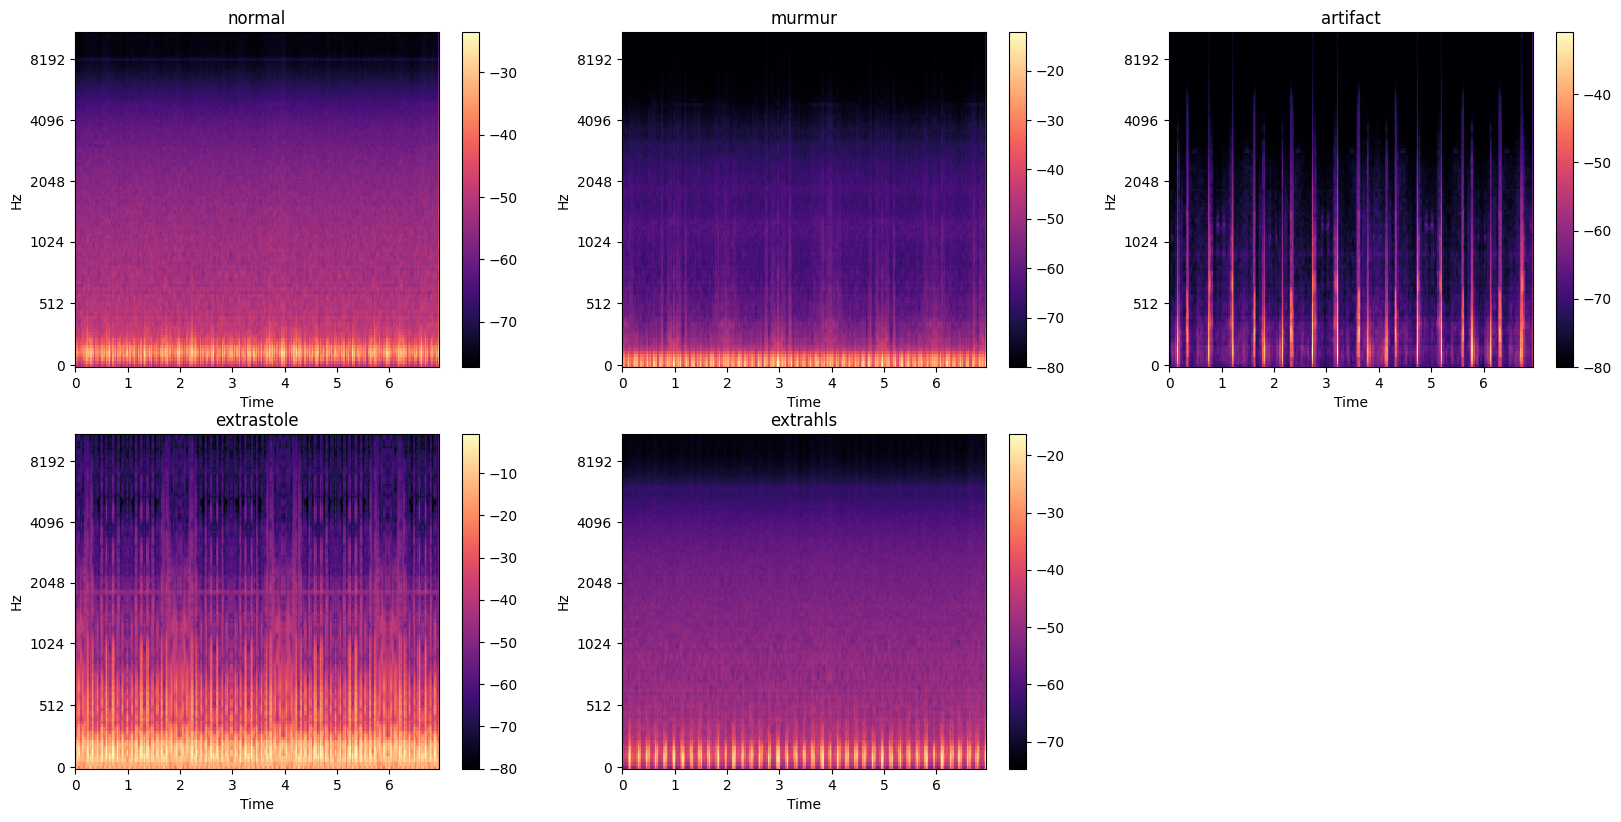

In [29]:
# plot classes of each spectogram and waveform after preprocessing
plt.figure(figsize=(20, 20))

for i, label in enumerate(label_counts.index):
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    filename = '../dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)
    audio = pad_or_truncate(audio, sample_rate)
    audio = reduce_noise_wiener(audio, noise_profile)
    spectrogram = audio_to_spectrogram(audio, sample_rate)
    plt.subplot(4, 3, i + 1)
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(f'{label}')



In [30]:
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

2024-08-05 09:42:52.699195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 09:42:55.263466: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-08-05 09:42:55.263627: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-08-05 09:42:55.276532: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-08-05 09:43:02.208143: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 2 compatible adapters.


tensorflow version:  2.10.0
keras version:  2.10.0


In [31]:
from sklearn.model_selection import train_test_split 

# Convert the spectrograms and labels to numpy arrays
X = np.array(spectrograms)
y = np.array(labels_list)


In [32]:
# print the shape of the X and y
X.shape, y.shape


((504, 128, 300), (504,))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# print the shape of the training and testing data and validation sets
print(X_train.shape, X_test.shape, X_val.shape)
# print the one data of each set
print(y_train[0], y_test[0], y_val[0])

(322, 128, 300) (101, 128, 300) (81, 128, 300)
normal normal murmur


In [34]:
# label encoding for the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)

# print the encoded labels with its corresponding class
print(le.classes_)
print(y_train_encoded[0], y_test_encoded[0], y_val_encoded[0])

['murmur' 'normal']
1 1 0


In [35]:
# handle the class imbalance
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_reshaped, y_train_encoded)
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2])

# print the shape of the resampled training data
print(X_train_resampled.shape, y_train_resampled.shape)

(472, 128, 300) (472,)


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Input layer and first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 300, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer and max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer and max pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional layer and max pooling
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to convert 2D matrix to 1D vector
model.add(layers.Flatten())

# Dropout layer to reduce overfitting
model.add(layers.Dropout(0.5))

# Fully connected dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # Adjust the number of output neurons to match the number of classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


2024-08-05 09:43:03.336664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 09:43:03.338708: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon RX 6600M)
2024-08-05 09:43:04.899674: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 1 (AMD Radeon(TM) Graphics)
2024-08-05 09:43:06.300686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:06.300727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. You

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 298, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 149, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 147, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 35, 128)      0

In [37]:
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], X_train_resampled.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded))

Epoch 1/20


2024-08-05 09:43:07.540938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:43:07.624185: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:07.624429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:07.624541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:43:07.624643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

15/15 [==============================] - 1s 52ms/step - loss: 2.4138 - accuracy: 0.5742 - val_loss: 2.8726 - val_accuracy: 0.3210
Epoch 2/20
 3/15 [=====>........................] - ETA: 0s - loss: 1.4639 - accuracy: 0.5417

2024-08-05 09:43:08.602994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:43:08.642784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:08.642889: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:08.642918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:43:08.642939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

15/15 [==============================] - 1s 40ms/step - loss: 0.9168 - accuracy: 0.5975 - val_loss: 0.7497 - val_accuracy: 0.3210
Epoch 3/20
15/15 [==============================] - 1s 39ms/step - loss: 0.5930 - accuracy: 0.6377 - val_loss: 0.4776 - val_accuracy: 0.8025
Epoch 4/20
15/15 [==============================] - 1s 40ms/step - loss: 0.5322 - accuracy: 0.7161 - val_loss: 0.6917 - val_accuracy: 0.6296
Epoch 5/20
15/15 [==============================] - 1s 40ms/step - loss: 0.5332 - accuracy: 0.6928 - val_loss: 0.4608 - val_accuracy: 0.8519
Epoch 6/20
15/15 [==============================] - 1s 40ms/step - loss: 0.4265 - accuracy: 0.7860 - val_loss: 0.4171 - val_accuracy: 0.8272
Epoch 7/20
15/15 [==============================] - 1s 40ms/step - loss: 0.4098 - accuracy: 0.8072 - val_loss: 0.3696 - val_accuracy: 0.8519
Epoch 8/20
15/15 [==============================] - 1s 41ms/step - loss: 0.4665 - accuracy: 0.7733 - val_loss: 0.4228 - val_accuracy: 0.8642
Epoch 9/20
15/15 [======

In [38]:
# print the evaluation of the model
test_loss, test_acc = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1), y_test_encoded)
print('Test accuracy:', test_acc)


4/4 [==============================] - 0s 14ms/step - loss: 0.5035 - accuracy: 0.7921
Test accuracy: 0.7920792102813721


In [39]:
import numpy as np
from sklearn.metrics import classification_report

# Get predicted probabilities
y_pred_prob = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Print the evaluation metrics
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

4/4 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

      murmur       0.67      0.86      0.75        37
      normal       0.91      0.75      0.82        64

    accuracy                           0.79       101
   macro avg       0.79      0.81      0.79       101
weighted avg       0.82      0.79      0.80       101



2024-08-05 09:43:20.393394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:43:20.452080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:20.452123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:20.452141: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:43:20.452152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

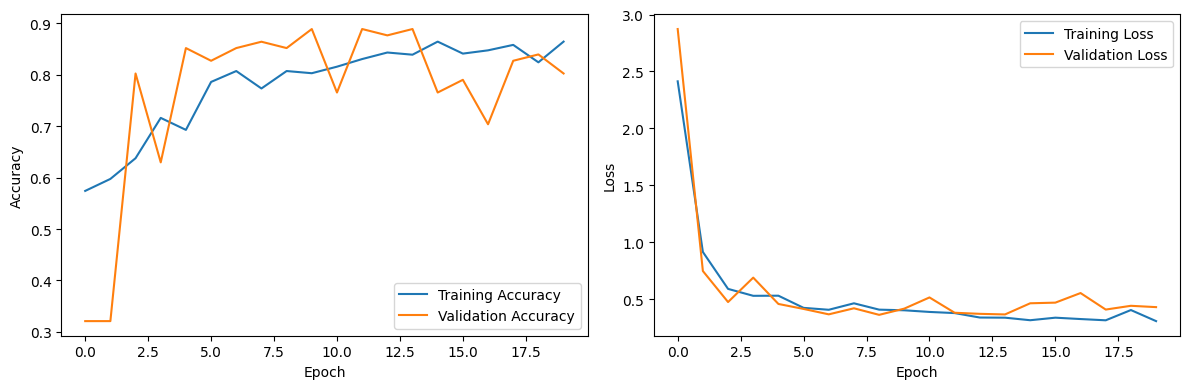

In [40]:
# plot the accuracy and loss of the model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prepare the data for other models

In [41]:
# def reshape_spectrogram(spectrograms):
#     return np.transpose(spectrograms, (0, 2, 1))


In [42]:
# X = reshape_spectrogram(X)

In [43]:
# X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], X_train_resampled.shape[2], 1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape the data to include the channel dimension
X_train_resampled = X_train_resampled.reshape(-1, 128, 300, 1)
X_val = X_val.reshape(-1, 128, 300, 1)
X_test = X_test.reshape(-1, 128, 300, 1)

def image_to_patches(images, patch_size):
    batch_size, img_height, img_width, channels = images.shape
    patches = tf.image.extract_patches(
        images=images,
        sizes=[1, patch_size, patch_size, 1],
        strides=[1, patch_size, patch_size, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )
    patch_dim = patches.shape[-1]
    patches = tf.reshape(patches, [batch_size, -1, patch_dim])
    return patches

# Convert images to patches
patch_size = 16
X_train_patches = image_to_patches(X_train_resampled, patch_size)
X_val_patches = image_to_patches(X_val, patch_size)
X_test_patches = image_to_patches(X_test, patch_size)

# Define the Vision Transformer model
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class VisionTransformer(models.Model):
    def __init__(self, num_classes, patch_size, num_patches, embed_dim, num_heads, ff_dim, num_layers):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.num_patches = num_patches
        self.embedding = layers.Dense(embed_dim)
        self.positional_embedding = tf.keras.layers.Embedding(input_dim=num_patches, output_dim=embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim) for _ in range(num_layers)]
        self.pooling = layers.GlobalAveragePooling1D()
        self.dense1 = layers.Dense(128, activation="relu")
        self.dropout = layers.Dropout(0.1)
        self.dense2 = layers.Dense(num_classes, activation="softmax")

    def call(self, x):
        batch_size = tf.shape(x)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.positional_embedding(positions)
        x = self.embedding(x)
        x = x + positions
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        x = self.pooling(x)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.dense2(x)

# Define parameters for the ViT model
num_classes = 2
num_patches = (128 // patch_size) * (300 // patch_size)
embed_dim = X_train_patches.shape[-1]
num_heads = 4
ff_dim = 128
num_layers = 8

# Instantiate the model
vit_model = VisionTransformer(num_classes, patch_size, num_patches, embed_dim, num_heads, ff_dim, num_layers)

# Build the model with the correct input shape
vit_model.build(input_shape=(None, num_patches, embed_dim))

# Compile the model
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
vit_model.summary()

# Train the model
history_vit = vit_model.fit(X_train_patches, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_val_patches, y_val_encoded))


Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  65792     
                                                                 
 embedding (Embedding)       multiple                  36864     
                                                                 
 transformer_block (Transfor  multiple                 1118848   
 merBlock)                                                       
                                                                 
 transformer_block_1 (Transf  multiple                 1118848   
 ormerBlock)                                                     
                                                                 
 transformer_block_2 (Transf  multiple                 1118848   
 ormerBlock)                                                     
                                                

2024-08-05 09:43:27.185285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:43:28.874101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:28.874159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:43:28.874189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:43:28.874206: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

15/15 [==============================] - ETA: 0s - loss: 1.2086 - accuracy: 0.5466

2024-08-05 09:44:14.000287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:44:14.245921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:44:14.245970: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:44:14.245991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:44:14.246004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

15/15 [==============================] - 53s 3s/step - loss: 1.2086 - accuracy: 0.5466 - val_loss: 0.9359 - val_accuracy: 0.3210
Epoch 2/20
15/15 [==============================] - 40s 3s/step - loss: 0.8665 - accuracy: 0.4979 - val_loss: 0.6276 - val_accuracy: 0.6790
Epoch 3/20
15/15 [==============================] - 39s 3s/step - loss: 0.8018 - accuracy: 0.4746 - val_loss: 0.8790 - val_accuracy: 0.3210
Epoch 4/20
15/15 [==============================] - 38s 3s/step - loss: 0.7297 - accuracy: 0.5085 - val_loss: 0.7748 - val_accuracy: 0.3210
Epoch 5/20
15/15 [==============================] - 38s 3s/step - loss: 0.7072 - accuracy: 0.5212 - val_loss: 0.7235 - val_accuracy: 0.3210
Epoch 6/20
15/15 [==============================] - 38s 3s/step - loss: 0.7239 - accuracy: 0.4534 - val_loss: 0.7039 - val_accuracy: 0.3210
Epoch 7/20
15/15 [==============================] - 38s 3s/step - loss: 0.7077 - accuracy: 0.5212 - val_loss: 0.7730 - val_accuracy: 0.3210
Epoch 8/20
15/15 [=============

In [45]:
# print the evaluation of the model
test_loss, test_acc = vit_model.evaluate(X_test_patches, y_test_encoded)
print('Test accuracy:', test_acc)


4/4 [==============================] - 3s 796ms/step - loss: 0.6882 - accuracy: 0.6337
Test accuracy: 0.6336633563041687


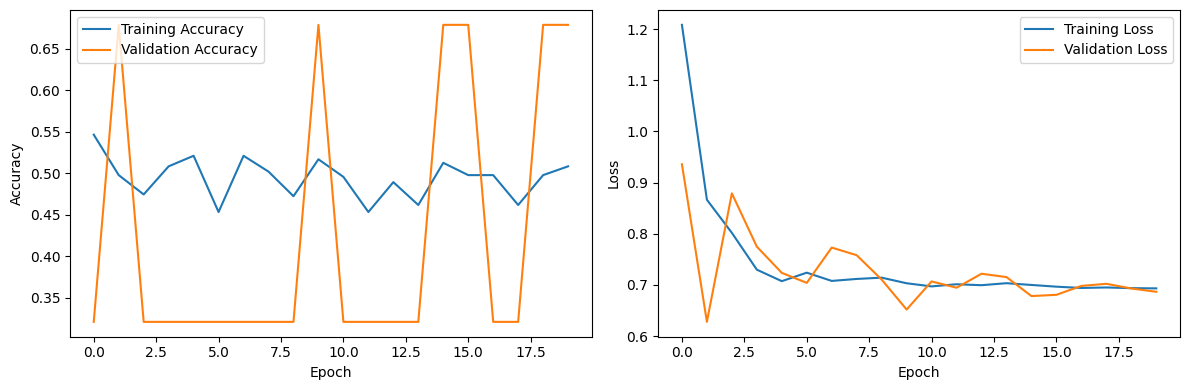

In [46]:
# plot the accuracy and loss of the model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_vit.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vit.history['loss'], label='Training Loss')
plt.plot(history_vit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
#print the classification report
import numpy as np  
from sklearn.metrics import classification_report

# Get predicted probabilities
y_pred_prob = vit_model.predict(X_test_patches)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Print the evaluation metrics
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


2024-08-05 09:56:39.536049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:56:39.761892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:56:39.761950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:56:39.761977: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:56:39.761994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

4/4 [==============================] - 4s 746ms/step
              precision    recall  f1-score   support

      murmur       0.00      0.00      0.00        37
      normal       0.63      1.00      0.78        64

    accuracy                           0.63       101
   macro avg       0.32      0.50      0.39       101
weighted avg       0.40      0.63      0.49       101



/home/richard_huu/miniconda3/envs/tfdirectml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/richard_huu/miniconda3/envs/tfdirectml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/richard_huu/miniconda3/envs/tfdirectml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# ConvLSTM

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape the data to include the channel dimension and timesteps
X_train_resampled = X_train_resampled.reshape(-1, 1, 128, 300, 1)  # (samples, timesteps, height, width, channels)
X_val = X_val.reshape(-1, 1, 128, 300, 1)
X_test = X_test.reshape(-1, 1, 128, 300, 1)

# Define the ConvLSTM model
conv_lstm_model = models.Sequential([
    layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(1, 128, 300, 1), return_sequences=True),
    layers.MaxPooling3D(pool_size=(1, 2, 2)),
    layers.ConvLSTM2D(filters=128, kernel_size=(3, 3), activation='relu', return_sequences=True),
    layers.MaxPooling3D(pool_size=(1, 2, 2)),
    layers.ConvLSTM2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
conv_lstm_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Print model summary
conv_lstm_model.summary()

# Train the model
history_conv_lstm = conv_lstm_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded))


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 126, 298, 64)   150016    
                                                                 
 max_pooling3d (MaxPooling3D  (None, 1, 63, 149, 64)   0         
 )                                                               
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 1, 61, 147, 128)   885248    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 1, 30, 73, 128)   0         
 3D)                                                             
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 28, 71, 256)       3539968   
                                                                 
 flatten_1 (Flatten)         (None, 508928)           

2024-08-05 09:56:47.787003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:56:49.745375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:56:49.745428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:56:49.745449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:56:49.745462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

15/15 [==============================] - ETA: 0s - loss: 0.8886 - accuracy: 0.4661

2024-08-05 09:57:55.081218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-08-05 09:57:55.325788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:57:55.325841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 09:57:55.325868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 09:57:55.325927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

15/15 [==============================] - 72s 3s/step - loss: 0.8886 - accuracy: 0.4661 - val_loss: 0.7776 - val_accuracy: 0.3210
Epoch 2/20
15/15 [==============================] - 48s 3s/step - loss: 0.6532 - accuracy: 0.5636 - val_loss: 0.5539 - val_accuracy: 0.7778
Epoch 3/20
15/15 [==============================] - 48s 3s/step - loss: 0.5702 - accuracy: 0.7013 - val_loss: 0.5507 - val_accuracy: 0.8272
Epoch 4/20
15/15 [==============================] - 47s 3s/step - loss: 0.5371 - accuracy: 0.7542 - val_loss: 0.5021 - val_accuracy: 0.8519
Epoch 5/20
15/15 [==============================] - 48s 3s/step - loss: 0.4939 - accuracy: 0.7648 - val_loss: 0.4600 - val_accuracy: 0.8272
Epoch 6/20
15/15 [==============================] - 48s 3s/step - loss: 0.4616 - accuracy: 0.7797 - val_loss: 0.4055 - val_accuracy: 0.8519
Epoch 7/20
15/15 [==============================] - 48s 3s/step - loss: 0.4281 - accuracy: 0.8157 - val_loss: 0.4604 - val_accuracy: 0.7901
Epoch 8/20
15/15 [=============

In [49]:
#print the evaluation of the model

test_loss, test_acc = conv_lstm_model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', test_acc)

4/4 [==============================] - 6s 1s/step - loss: 0.8832 - accuracy: 0.7921
Test accuracy: 0.7920792102813721


In [50]:
#print the evaluation metrics

import numpy as np
from sklearn.metrics import classification_report

# Get predicted probabilities
y_pred_prob = conv_lstm_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Print the evaluation metrics
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


2024-08-05 10:17:29.249622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/4 [======>.......................] - ETA: 7s

2024-08-05 10:17:29.470160: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 10:17:29.470234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-05 10:17:29.470349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13030 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-08-05 10:17:29.470595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 7908 MB memory) -> physical PluggableDevice (device: 1, name: D

4/4 [==============================] - 7s 1s/step
              precision    recall  f1-score   support

      murmur       0.77      0.62      0.69        37
      normal       0.80      0.89      0.84        64

    accuracy                           0.79       101
   macro avg       0.78      0.76      0.77       101
weighted avg       0.79      0.79      0.79       101



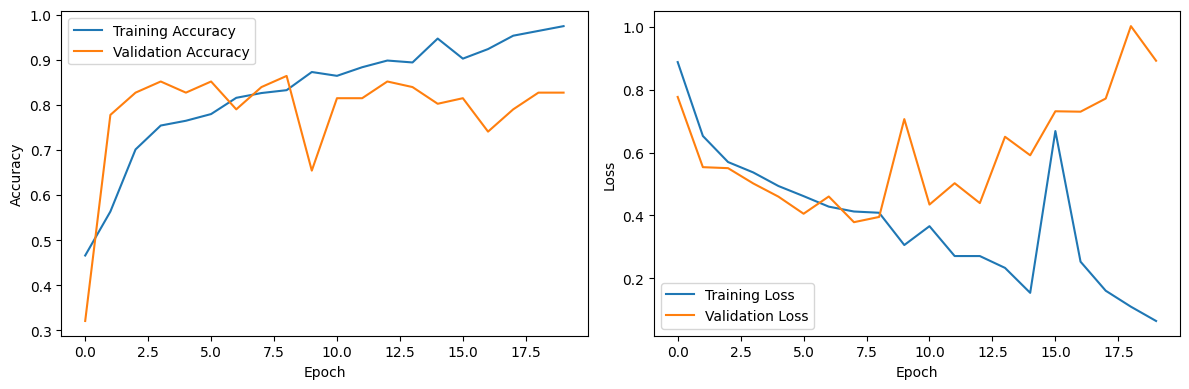

In [51]:
#plot the accuracy and loss of the model

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_conv_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_conv_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_conv_lstm.history['loss'], label='Training Loss')
plt.plot(history_conv_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()